In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [13]:
sns.set(style="darkgrid", color_codes=True)
pd.set_option('display.max_columns', 75)

In [19]:
df = pd.read_csv('groceries - groceries.csv', header = None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9835 entries, 0 to 9834
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       9835 non-null   object
 1   1       7676 non-null   object
 2   2       6033 non-null   object
 3   3       4734 non-null   object
 4   4       3729 non-null   object
 5   5       2874 non-null   object
 6   6       2229 non-null   object
 7   7       1684 non-null   object
 8   8       1246 non-null   object
 9   9       896 non-null    object
 10  10      650 non-null    object
 11  11      468 non-null    object
 12  12      351 non-null    object
 13  13      273 non-null    object
 14  14      196 non-null    object
 15  15      141 non-null    object
 16  16      95 non-null     object
 17  17      66 non-null     object
 18  18      52 non-null     object
 19  19      38 non-null     object
 20  20      29 non-null     object
 21  21      18 non-null     object
 22  22      14 non-null     

In [20]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
count,9835,7676,6033,4734,3729,2874,2229,1684,1246,896,650,468,351,273,196,141,95,66,52,38,29,18,14,8,7,7,6,5,4,1,1,1
unique,158,151,155,153,150,137,138,140,128,120,116,103,88,84,74,63,49,44,33,29,23,17,13,7,6,7,5,4,3,1,1,1
top,sausage,whole milk,whole milk,whole milk,rolls/buns,soda,soda,shopping bags,soda,shopping bags,shopping bags,soda,soda,shopping bags,shopping bags,shopping bags,napkins,chocolate,fruit/vegetable juice,bottled beer,napkins,napkins,waffles,bottled beer,chocolate,long life bakery product,hygiene articles,napkins,house keeping products,skin care,hygiene articles,candles
freq,825,654,506,315,176,150,120,76,61,49,40,30,24,18,16,11,8,5,4,3,4,2,2,2,2,1,2,2,2,1,1,1


## Exploratory Data Analysis

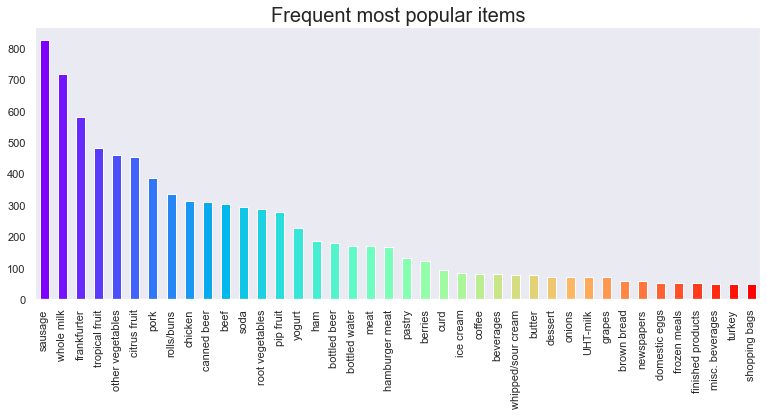

In [22]:
color = plt.cm.rainbow(np.linspace(0,1,40))
df[0].value_counts().head(40).plot.bar(color = color, figsize=(13,5))
plt.title('Frequent most popular items', fontsize = 20)
plt.xticks(rotation = 90)
plt.grid()
plt.show()

In [29]:
#import networks as nx
import networkx as nx
df['food'] = 'Food'
food = df.truncate(before = -1, after = 15)
food = nx.from_pandas_edgelist(food, source = 'food', target = 0, edge_attr = True)

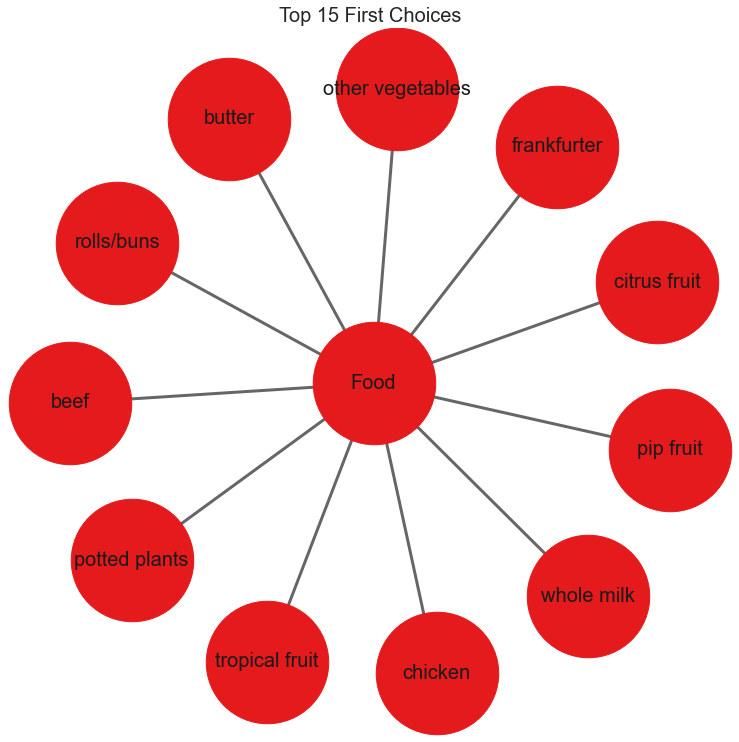

In [31]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (13, 13)
pos = nx.spring_layout(food)
color = plt.cm.Set1(np.linspace(0, 15, 1))
nx.draw_networkx_nodes(food, pos, node_size = 15000, node_color = color)
nx.draw_networkx_edges(food, pos, width = 3, alpha = 0.6, edge_color = 'black')
nx.draw_networkx_labels(food, pos, font_size = 20, font_family = 'sans-serif')
plt.axis('off')
plt.grid()
plt.title('Top 15 First Choices', fontsize = 20)
plt.show()

## Creat a list of transactions

#### let create a list of transactions which can be created by understanding the total number of transactions, and total number of columns in each transactions. 

In [33]:
# list of transactions from the dataset
transactions = []
for i in range(0, len(df)):
    transactions.append([str(df.values[i,j]) for j in range (0, len(df.columns))])

In [34]:
transactions[:1]

[['citrus fruit',
  'semi-finished bread',
  'margarine',
  'ready soups',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'Food']]

## Association rules

### Assocition rule
##### Contains antecedent and consquent
    {health} -- {cooking}
    
### Multi-antecedent rule
    {humor, travel} → {language}
### Multi-consequent rule
    {biography} → {history, language}
### Multi-antecedent and consequent rule
    {biography, non-fiction} → {history, language}
    
    
## Difficulty of selecting rules¶

##### Finding useful rules is difficult.
    ###### Set of all possible rules is large.
    ###### Most rules are not useful.
    ###### Must discard most rules.
##### What if we restrict ourselves to simple rules?
    ###### One antecedent and one consequent.
    ###### Still challenging, even for small dataset.

In [37]:
from itertools import permutations

# Extract unique items.
flattened = [item for transaction in transactions for item in transaction]
items = list(set(flattened))

In [38]:
print('# of items:',len(items))
print(list(items))

# of items: 171
['soft cheese', 'chocolate marshmallow', 'pastry', 'syrup', 'snack products', 'cat food', 'cereals', 'canned fruit', 'whole milk', 'frankfurter', 'salty snack', 'butter', 'beverages', 'newspapers', 'bathroom cleaner', 'salad dressing', 'sparkling wine', 'frozen chicken', 'abrasive cleaner', 'white bread', 'sausage', 'tea', 'house keeping products', 'kitchen towels', 'ham', 'red/blush wine', 'baby cosmetics', 'meat spreads', 'salt', 'ice cream', 'dishes', 'pasta', 'detergent', 'fish', 'mustard', 'rum', 'candy', 'frozen dessert', 'pudding powder', 'preservation products', 'whisky', 'honey', 'root vegetables', 'turkey', 'cooking chocolate', 'curd cheese', 'specialty bar', 'berries', 'specialty cheese', 'long life bakery product', 'cream cheese', 'herbs', 'hygiene articles', 'white wine', 'sugar', 'liquor (appetizer)', 'fruit/vegetable juice', 'male cosmetics', 'prosecco', 'canned vegetables', 'finished products', 'kitchen utensil', 'domestic eggs', 'flower soil/fertilizer'

In [39]:
if 'nan' in items: items.remove('nan')
print(list(items))

['soft cheese', 'chocolate marshmallow', 'pastry', 'syrup', 'snack products', 'cat food', 'cereals', 'canned fruit', 'whole milk', 'frankfurter', 'salty snack', 'butter', 'beverages', 'newspapers', 'bathroom cleaner', 'salad dressing', 'sparkling wine', 'frozen chicken', 'abrasive cleaner', 'white bread', 'sausage', 'tea', 'house keeping products', 'kitchen towels', 'ham', 'red/blush wine', 'baby cosmetics', 'meat spreads', 'salt', 'ice cream', 'dishes', 'pasta', 'detergent', 'fish', 'mustard', 'rum', 'candy', 'frozen dessert', 'pudding powder', 'preservation products', 'whisky', 'honey', 'root vegetables', 'turkey', 'cooking chocolate', 'curd cheese', 'specialty bar', 'berries', 'specialty cheese', 'long life bakery product', 'cream cheese', 'herbs', 'hygiene articles', 'white wine', 'sugar', 'liquor (appetizer)', 'fruit/vegetable juice', 'male cosmetics', 'prosecco', 'canned vegetables', 'finished products', 'kitchen utensil', 'domestic eggs', 'flower soil/fertilizer', 'processed che

In [40]:
# Compute and print rules.
rules = list(permutations(items, 2))
print('# of rules:',len(rules))
print(rules[:5])

# of rules: 28730
[('soft cheese', 'chocolate marshmallow'), ('soft cheese', 'pastry'), ('soft cheese', 'syrup'), ('soft cheese', 'snack products'), ('soft cheese', 'cat food')]


## One-hot encoding transaction data

##### Now, lets split each transaction string into a list by using a lambda function to transform the column into a list of lists. Then, transform the transactions into a one-hot encoded DataFrame, where each column consists of TRUE and False values that indicate whether an item was included in a transaction.

In [41]:
# Import the transaction encoder function from mlxtend
from mlxtend.preprocessing import TransactionEncoder

# Instantiate transaction encoder and identify unique items
encoder = TransactionEncoder().fit(transactions)

# One-hot encode transactions
onehot = encoder.transform(transactions)

# Convert one-hot encoded data to DataFrame
onehot = pd.DataFrame(onehot, columns = encoder.columns_).drop('nan', axis=1)

# Print the one-hot encoded transaction dataset
onehot.head()

,Food,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,berries,beverages,bottled beer,bottled water,brandy,brown bread,butter,butter milk,cake bar,candles,candy,canned beer,canned fish,canned fruit,canned vegetables,cat food,cereals,chewing gum,chicken,chocolate,chocolate marshmallow,citrus fruit,cleaner,cling film/bags,cocoa drinks,coffee,...,seasonal products,semi-finished bread,shopping bags,skin care,sliced cheese,snack products,soap,soda,soft cheese,softener,sound storage medium,soups,sparkling wine,specialty bar,specialty cheese,specialty chocolate,specialty fat,specialty vegetables,spices,spread cheese,sugar,sweet spreads,syrup,tea,tidbits,toilet cleaner,tropical fruit,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False
2,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False


### Metrics and pruning¶
##### A metric is a measure of performance for rules.
        {humor} → {poetry}
            0.81
        {fiction} → {travel}
            0.23
##### Pruning is the use of metrics to discard rules.
        Retain: {humor} → {poetry}
        Discard: { ction} → {travel}

### The simplest metric
##### The support metric measures the share of transactions that contain an itemset.
            number of transactions with items(s) / number of transactions
 


In [42]:
# Compute the support
support = onehot.mean()
support = pd.DataFrame(support, columns=['support']).sort_values('support',ascending=False)

# Print the support
support.head()

,support
Food,1.000000
whole milk,0.255516
other vegetables,0.193493
rolls/buns,0.183935
soda,0.174377


In [43]:
support.describe()

,support
count,170.000000
mean,0.031820
std,0.083998
min,0.000102
25%,0.003940
50%,0.010625
75%,0.032461
max,1.000000


### Confidence and lift¶
##### When support is misleading

        Milk and bread frequently purchased together.
                Support: {Milk} → {Bread}
        Rule is not informative for marketing.
                Milk and bread are both independently popular items.
### The confidence metric
        Can improve over support with additional metrics.
        Adding confidence provides a more complete picture.
        Confidence gives us the probability we will purchase  Y  given we have purchased  X .
                    SupportX&Y/SupportX

### The lift metric
##### Lift provides another metric for evaluating the relationship between items.
         Numerator: Proportion of transactions that contain  X  and  Y .
         Denominator: Proportion if  X  and  Y  are assigned randomly and independently to transactions.
                         Support(X&Y) / Support(X)Support(Y)
 
##### Lift  >1  tells us  2  items occur in transactions together more often than we would expect based on their individual support values. This means the relationship is unlikely to be explained by random chance. This natural threshold is convenient for filtering purposes.
##### Lift  <1  tells us  2  items are paired together less frequently in transactions than we would expect if the pairings occurred by random chance.

### Recommending food with support

##### Market basket analysis can be used to help a grocery stores to make more members to each more or spend more by understanding the relation between highly rated food items

In [51]:
# Compute support for citrus and tropical fruits
supportBF = np.logical_and(onehot['citrus fruit'], onehot['tropical fruit']).mean()

# Compute support for citrus and pip fruits 
supportBM = np.logical_and(onehot['citrus fruit'], onehot['pip fruit']).mean()

# Compute support for chicken and other vegetables
supportFM = np.logical_and(onehot['chicken'], onehot['other vegetables']).mean()


# Print support values
print("citrus and tropical fruits: %.2f" % supportBF)
print("citrus and pip fruits: %.2f" % supportBM)
print("chicken and other vegetables: %.2f" % supportFM)

citrus and tropical fruits: 0.02
citrus and pip fruits: 0.01
chicken and other vegetables: 0.02


In [55]:
## Computing the support metric

# Add a chicken + citrus fruit column to the DataFrame onehot
onehot['chicken + citrus fruit'] = np.logical_and(onehot['chicken'], onehot['citrus fruit'])

# Compute the support
support = onehot.mean()
val = support.loc['chicken + citrus fruit']

# Print the support values
print(f'chicken + citrus fruit support = {val}')

chicken + citrus fruit support = 0.006914082358922217


In [56]:
# Refining support with confidence

# now the store wants to know the direction of relationship. chicken to promote citrus fruit or citrus fruit to promote chicken?

# Compute support for mineral water and french fries
supportMF = np.logical_and(onehot['chicken'], onehot['citrus fruit']).mean()

# Compute support for mineral water
supportM = onehot['chicken'].mean()

# Compute support for french fries
supportF = onehot['citrus fruit'].mean()

# Compute confidence for both rules
confidenceMM = supportMF / supportM
confidenceMF = supportMF / supportF

# Print results
print('chicken = {0:.2f}, citrus fruit = {1:.2f}'.format(confidenceMM, confidenceMF))

chicken = 0.16, citrus fruit = 0.08


##### Even though the support is identical for the two association rules, the confidence is much higher for chicken -> citrus fruit, since chicken has a higher support than citrus fruit.

In [60]:
## lets prove the relationship with "lift". if lift is less than 1, then chicken and citrus foods are paired together 
## less frequently than paired randomly.

# Compute lift
lift = supportMF / (supportM * supportF)

# Print lift
print("Lift: %.2f" % lift)

Lift: 1.95


#### since, the lift is above 1, that means we have confident to suggest the association has occured not by random choice.